In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
grey = '#aca7a7'

In [2]:
df = pd.read_pickle('../data/watch_list_clean.pkl.xz')

In [3]:
anime = df[['title', 'num_eps', 'ongoing', 'duration', 'studio', 'start_year', 
            'end_year', 'season', 'avg_rating', 'num_votes', 'synopsis', 'tags', 'content_warnings', 
            'url']].drop_duplicates(['title', 'url'],
                                    ignore_index=True).sort_values('avg_rating', 
                                                                   ascending=False, 
                                                                   ignore_index=True).copy(deep=True)
anime[['start_year', 'end_year']] = anime[['start_year', 'end_year']].replace('TBA', np.NaN).astype('float')

In [4]:
df.sample(5)

,title,url,username,status,times_watched,user_rating,num_eps,ongoing,duration,studio,start_year,end_year,season,avg_rating,num_votes,synopsis,tags,content_warnings
6621636,Tokyo Ghoul,https://www.anime-planet.com/anime/tokyo-ghoul,YellowTamaki,Watched,1,4.0,12,False,NaN,Pierrot,2014,2014,Summer,4.176,82422,"In modern day Tokyo, society lives in fear of ...","[Action, Drama, Horror, Seinen, Human Experime...","[Cannibalism,, Explicit Violence,, Mature Them..."
4177959,Classroom of the Elite,https://www.anime-planet.com/anime/classroom-o...,rhipsi,Stalled,0,3.0,12,False,NaN,Lerche,2017,2017,Summer,4.103,21887,Ayanokouji Kiyotaka has just enrolled at Tokyo...,"[Drama, Ecchi, Boarding School, Psychological,...",None
894032,Tanaka-kun is Always Listless,https://www.anime-planet.com/anime/tanaka-kun-...,Xnot,Watched,1,4.0,12,False,NaN,SILVER LINK.,2016,2016,Spring,4.052,9905,Adapted from the popular web manga series publ...,"[Comedy, Slice of Life, Iyashikei, School Life...",None
2973259,The Quintessential Quintuplets,https://www.anime-planet.com/anime/the-quintes...,AirAnt,Watched,1,5.0,12,False,NaN,Tezuka Productions,2019,2019,Winter,4.046,12552,"One day, a poor high school second-year named ...","[Comedy, Drama, Harem, Romance, Shounen, Schoo...",None
1583162,Hybrid x Heart Magias Academy Ataraxia,https://www.anime-planet.com/anime/hybrid-x-he...,Matas,Watched,1,3.0,12,False,NaN,Production IMS,2016,2016,Summer,3.130,5010,"One day, humanity was invaded by another world...","[Action, Ecchi, Fantasy, Harem, Borderline H, ...",[Explicit Sex]


In [5]:
anime.head()

,title,num_eps,ongoing,duration,studio,start_year,end_year,season,avg_rating,num_votes,synopsis,tags,content_warnings,url
0,Fruits Basket the Final Season,13,False,NaN,TMS Entertainment,2021.0,2021.0,Spring,4.633,4764,The final arc of Fruits Basket.,"[Drama, Fantasy, Romance, Shoujo, Animal Trans...","[Emotional Abuse,, Mature Themes,, Suicide]",https://www.anime-planet.com/anime/fruits-bask...
1,Fullmetal Alchemist: Brotherhood,64,False,NaN,Bones,2009.0,2010.0,Spring,4.580,102561,The foundation of alchemy is based on the law ...,"[Action, Adventure, Drama, Fantasy, Mystery, S...","[Animal Abuse,, Mature Themes,, Violence,, Dom...",https://www.anime-planet.com/anime/fullmetal-a...
2,Attack on Titan 3rd Season: Part II,10,False,NaN,WIT Studio,2019.0,2019.0,Spring,4.578,39571,The battle to retake Wall Maria begins now! Wi...,"[Action, Fantasy, Horror, Shounen, Dark Fantas...","[Cannibalism,, Explicit Violence]",https://www.anime-planet.com/anime/attack-on-t...
3,Attack on Titan The Final Season,16,False,NaN,MAPPA,2020.0,2021.0,Fall,4.578,25518,It's been four years since the Scout Regiment ...,"[Action, Drama, Fantasy, Horror, Shounen, Dark...","[Explicit Violence,, Mature Themes,, Physical ...",https://www.anime-planet.com/anime/attack-on-t...
4,Jujutsu Kaisen,24,False,NaN,MAPPA,2020.0,2021.0,Fall,4.577,36351,Although Yuji Itadori looks like your average ...,"[Action, Horror, Shounen, Curse, Monsters, Sch...",[Explicit Violence],https://www.anime-planet.com/anime/jujutsu-kaisen


### `title`/`anime_url`

In [6]:
df['title'].nunique()

4473

#### Which shows are the most popular?

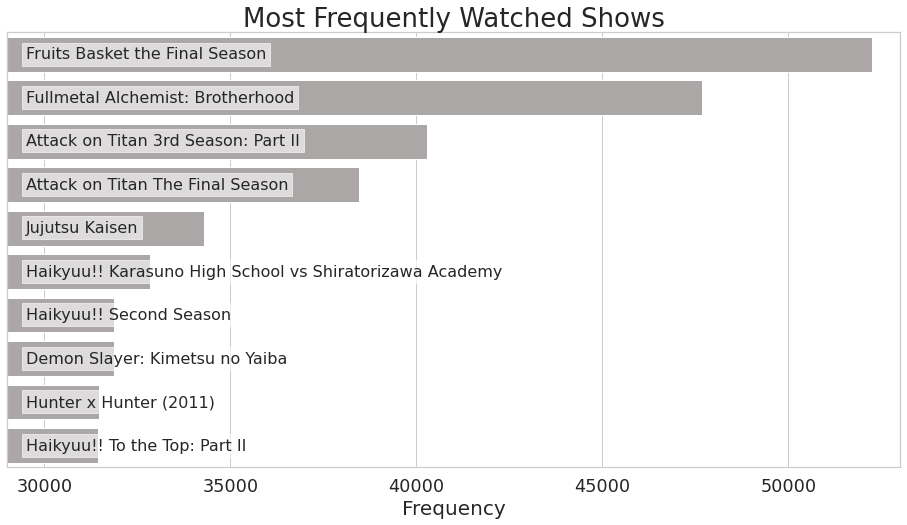

In [152]:
fig = plt.figure(figsize=(16, 8))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='title', data=df, 
              order=df['title'].value_counts().iloc[:10].index,
              color=grey, saturation=1)
plt.title('Most Frequently Watched Shows', fontdict={'fontsize':26})
plt.xlabel('Frequency', fontdict={'fontsize':20})
plt.ylabel('')
plt.yticks([])
plt.xlim(29000, 53000)
for idx, val in enumerate(top10['title']):
    plt.text(29500, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.show()

### `num_eps`

In [8]:
anime['num_eps'].agg(['min', 'median', 'mean', 'max'])

min          1.000000
median      20.000000
mean        35.872569
max       2617.000000
Name: num_eps, dtype: float64

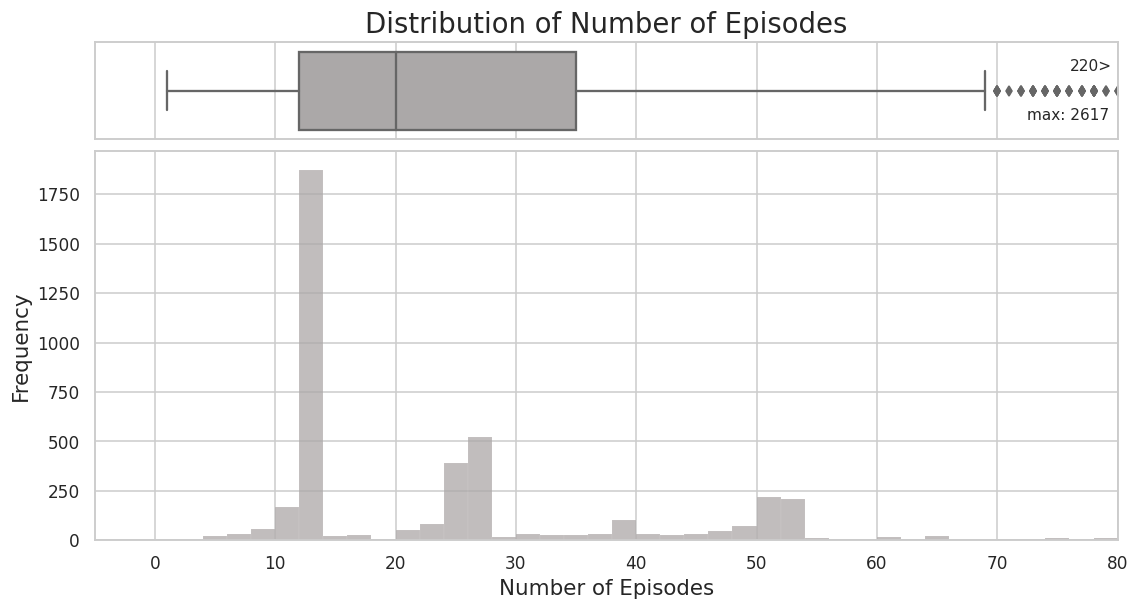

In [45]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 6), dpi=110)
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='num_eps', data=anime, color=grey, ax=axs[0])
sns.histplot(x='num_eps', data=anime, bins=range(0, 116, 2), color=grey, ax=axs[1])

axs[0].set_title('Distribution of Number of Episodes', fontdict={'fontsize':18})
axs[0].set_xlabel('')
axs[0].text(x=76, y=-0.2, s=f"{anime.query('num_eps >= 80').shape[0]}>", fontdict={'fontsize':10})
axs[0].text(x=72.5, y=0.3, s=f"max: {anime['num_eps'].max()}", fontdict={'fontsize':10})

axs[1].set_xlabel('Number of Episodes', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
axs[1].set_xlim(-5, 80)
plt.show()

In [50]:
anime.loc[anime['num_eps'] == anime['num_eps'].max(), ['title', 'num_eps', 'ongoing', 'start_year', 'end_year', 'duration']]

,title,num_eps,ongoing,start_year,end_year,duration
3513,Sazae-san,2617,True,1969.0,NaN,NaN


### `ongoing`

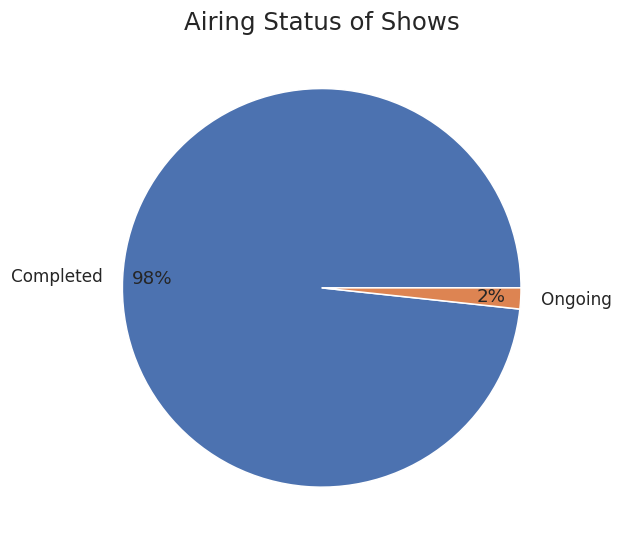

In [129]:
fig = plt.figure(figsize=(10, 6), dpi=110)
plt.pie(anime['ongoing'].value_counts(), labels=['Completed', 'Ongoing'], autopct='%1.0f%%', pctdistance=0.85, labeldistance=1.1)
plt.title('Airing Status of Shows', fontdict={'fontsize':16})
plt.show()

### `duration`

In [48]:
anime['duration'].agg(['min', 'median', 'mean', 'max'])

min        1.000000
median     5.000000
mean       7.246784
max       90.000000
Name: duration, dtype: float64

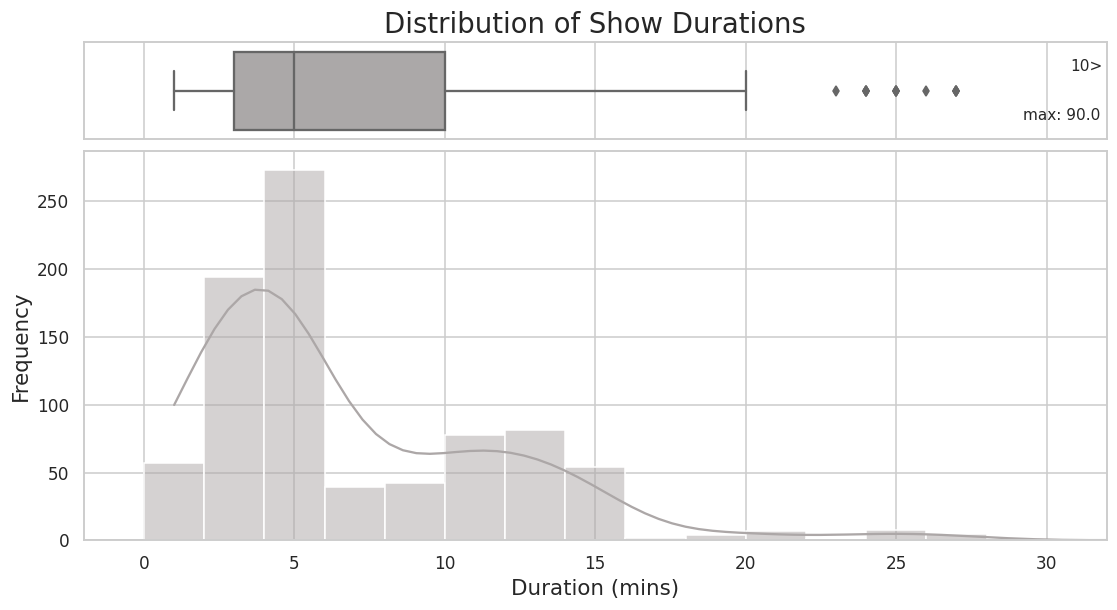

In [59]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 6), dpi=110)
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='duration', data=anime, color=grey, ax=axs[0])
sns.histplot(x='duration', data=anime, kde=True, bins=range(0, 116, 2), color=grey, ax=axs[1])

axs[0].set_title('Distribution of Show Durations', fontdict={'fontsize':18})
axs[0].set_xlabel('')
axs[0].text(x=30.8, y=-0.2, s=f"{anime.query('duration >= 32').shape[0]}>", fontdict={'fontsize':10})
axs[0].text(x=29.2, y=0.3, s=f"max: {anime['duration'].max()}", fontdict={'fontsize':10})

axs[1].set_xlabel('Duration (mins)', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
axs[1].set_xlim(-2, 32)
plt.show()

In [51]:
anime.loc[anime['duration'] == anime['duration'].max(), ['title', 'duration', 'num_eps', 'ongoing', 'start_year', 'end_year']]

,title,duration,num_eps,ongoing,start_year,end_year
3704,Heidi: Heidi to Clara Hen,90.0,1,False,1996.0,1996.0


### `studio`

In [62]:
anime['studio'].nunique()

347

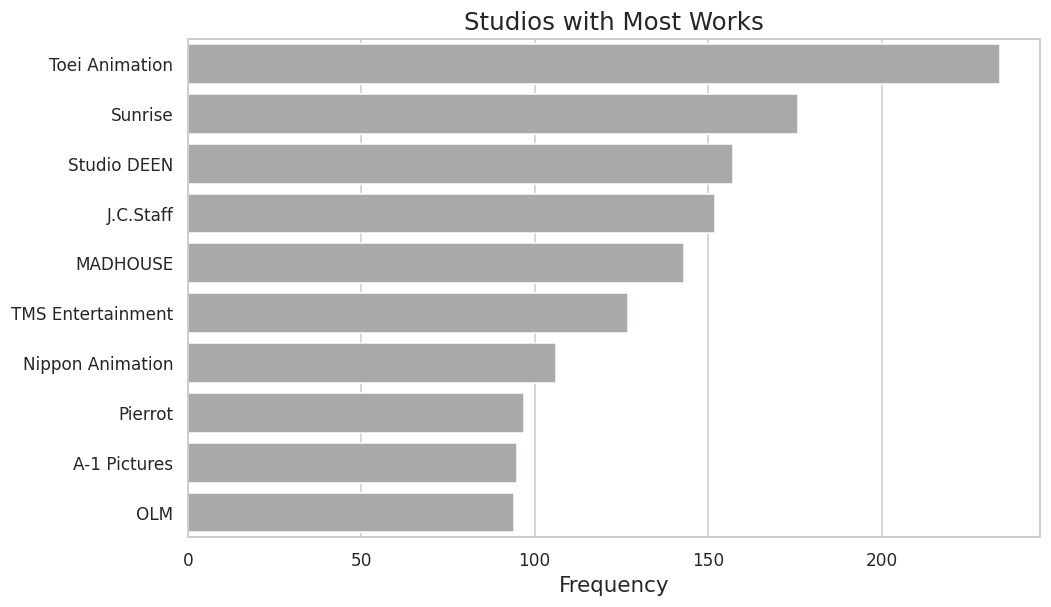

In [61]:
fig = plt.figure(figsize=(10, 6), dpi=110)
sns.set_theme(font_scale=1, style='whitegrid')
sns.countplot(y='studio', data=anime, 
              order=anime['studio'].value_counts().iloc[:10].index,
              color=grey)
plt.title('Studios with Most Works', fontdict={'fontsize':16})
plt.xlabel('Frequency', fontdict={'fontsize':14})
plt.ylabel('')
plt.show()

### `start_year`

In [63]:
anime['start_year'].agg(['min', 'mean', 'median', 'max'])

min       1961.000000
mean      2006.406662
median    2010.000000
max       2021.000000
Name: start_year, dtype: float64

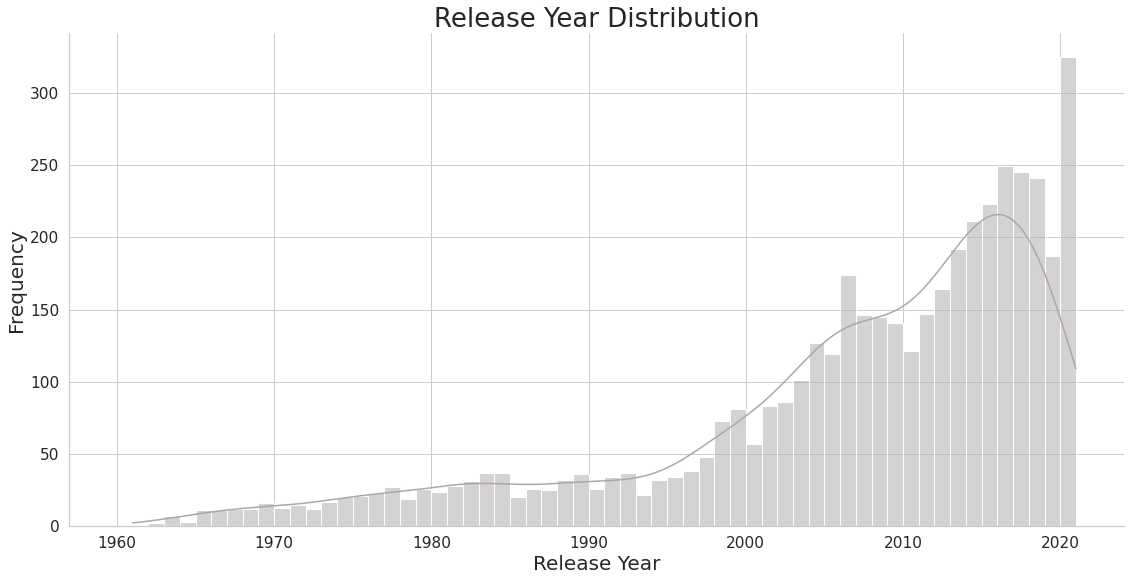

In [64]:
sns.set_theme(font_scale=1.4, style='whitegrid')
sns.displot(x='start_year', data=anime, bins=[year for year in range(1960, 2022)], kde=True, color=grey, height=8, aspect=2)
plt.title('Release Year Distribution', fontdict={'fontsize':26})
plt.xlabel('Release Year', fontdict={'fontsize':20})
plt.ylabel('Frequency', fontdict={'fontsize':20})
plt.show()

### `season`

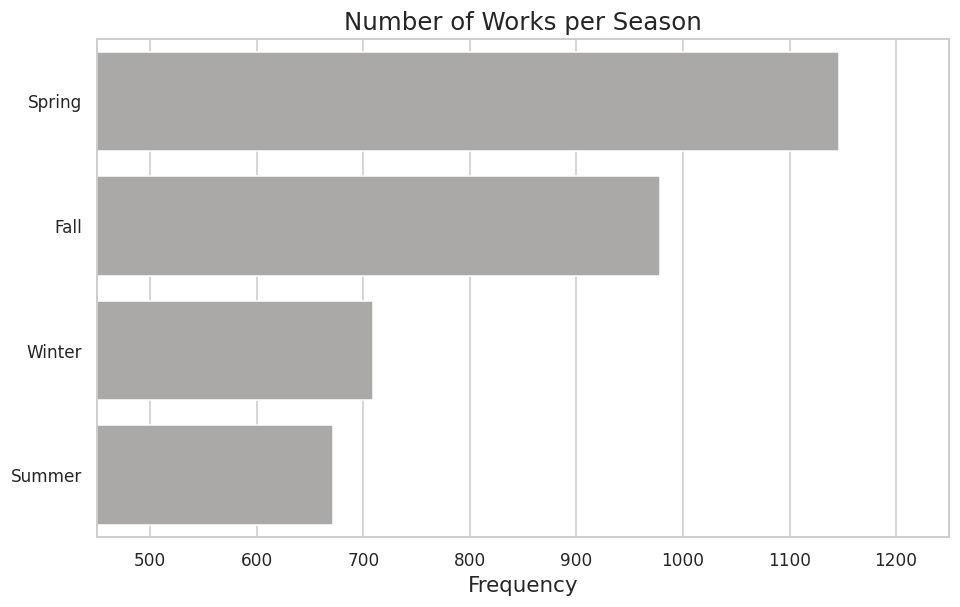

In [72]:
fig = plt.figure(figsize=(10, 6), dpi=110)
sns.set_theme(font_scale=1, style='whitegrid')
sns.countplot(y='season', data=anime, 
              order=anime['season'].value_counts().index,
              color=grey)
plt.title('Number of Works per Season', fontdict={'fontsize':16})
plt.xlabel('Frequency', fontdict={'fontsize':14})
plt.ylabel('')
plt.xlim(450, 1250)
plt.show()

### `avg_rating`

#### Which shows are the highest rated?

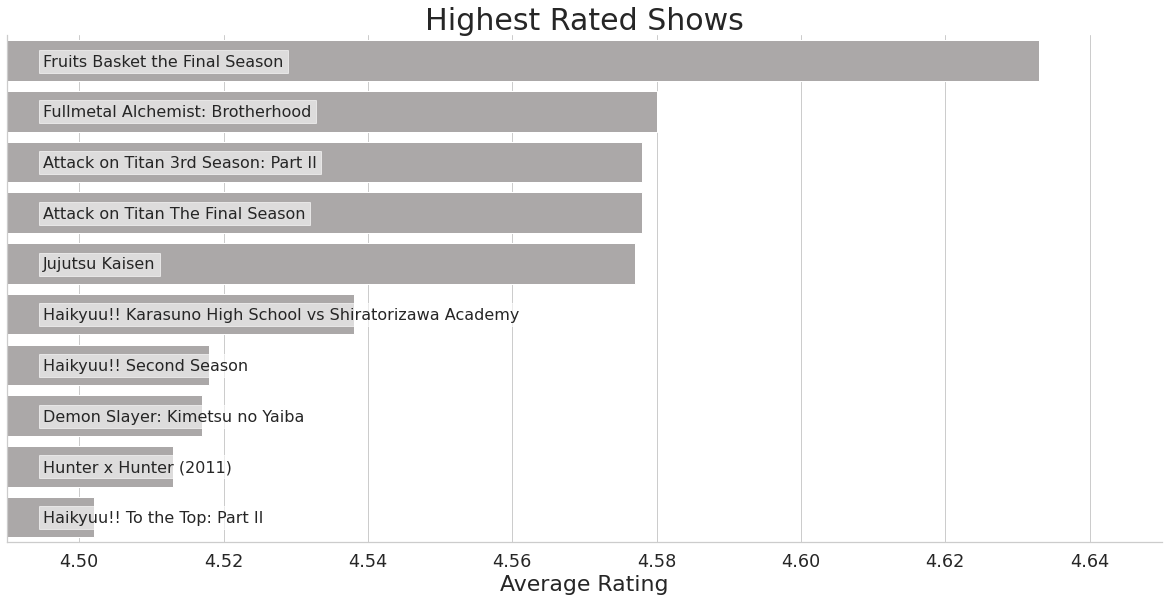

In [114]:
top10 = anime.head(10).copy(deep=True)
top10['title'] = top10['title'].astype('string')

sns.set_theme(font_scale=1.6, style='whitegrid')
sns.catplot(x='avg_rating', y='title', data=top10, kind='bar', height=8, aspect=3, color=grey)
plt.title('Highest Rated Shows', fontdict={'fontsize':30})
plt.xlabel('Average Rating', fontdict={'fontsize':22})
plt.ylabel('')
plt.yticks([])
plt.xlim(4.49, 4.65)
for idx, val in enumerate(top10['title']):
    plt.text(4.495, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.show()

### `num_votes`

#### Which shows have the most votes?

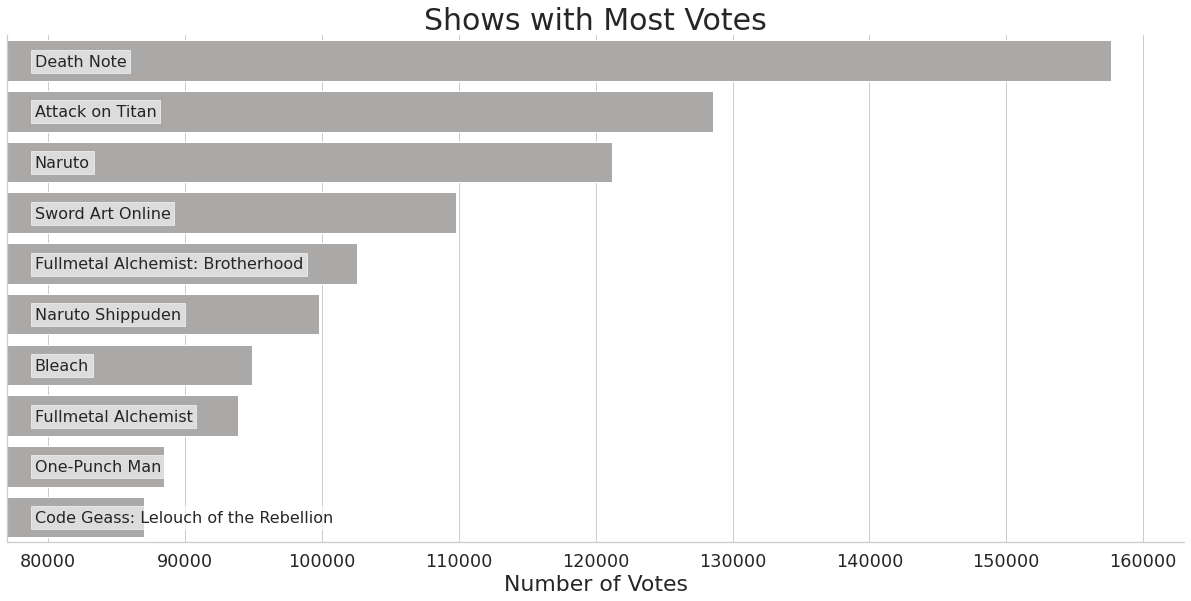

In [170]:
top10 = anime.sort_values('num_votes', ascending=False).head(10).copy(deep=True)
top10['title'] = top10['title'].astype('string')

sns.set_theme(font_scale=1.6, style='whitegrid')
sns.catplot(x='num_votes', y='title', data=top10, kind='bar', height=8, aspect=2.7, color=grey)
plt.title('Shows with Most Votes', fontdict={'fontsize':30})
plt.xlabel('Number of Votes', fontdict={'fontsize':22})
plt.ylabel('')
plt.yticks([])
plt.xlim(77000, 163000)
for idx, val in enumerate(top10['title']):
    plt.text(79000, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.show()

### `num_votes`

#### Which shows have the highest number of votes?

In [ ]:
top10 = anime.sort_values('num_votes', ascending=False, ignore_index=True).head(10).copy(deep=True)
top10['title'] = top10['title'].astype('string')

sns.set_theme(font_scale=1.6, style='whitegrid')
sns.catplot(x='num_votes', y='title', data=top10, kind='bar', height=8, aspect=2.5, color=grey)
plt.title('Highest Rated Shows', fontdict={'fontsize':30})
plt.xlabel('Average Rating', fontdict={'fontsize':22})
plt.ylabel('')
plt.xlim(80000, 160000)
plt.show()

### `username`

In [ ]:
df['username'].nunique()

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(y='username', data=df, 
              order=df['username'].value_counts().iloc[:10].index,
              color=grey)
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

### `avg`

In [ ]:
df['avg'].agg(['min', 'max'])

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.kdeplot(x=df['avg'].astype('float'), bw_adjust=3, color=grey)
plt.show()

### `status`

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(x='status', data=df, color=grey)
plt.show()

In [ ]:
df['status'].value_counts()

### `total_eps`

In [ ]:
df['total_eps'].agg(['min', 'max'])

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.kdeplot(x=df.loc[df['total_eps'] <= 100, 'total_eps'], bw_adjust=3, color=grey)
plt.show()

In [ ]:
df['total_eps'].value_counts().head(15)

### `times_watched`

In [ ]:
df['times_watched'].agg(['min', 'max'])

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(x=df.loc[df['times_watched'] <= 10, 'times_watched'], color=grey)
plt.show()

### `rating`

In [ ]:
df['rating'].agg(['min', 'max'])

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(x=df['rating'], color=grey)
plt.show()

### Only watched

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(y='username', data=df, 
              order=df.loc[df['status'] == 'Watched', 'username'].value_counts().iloc[:10].index,
              color=grey)
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

Wow... exact same users in the same order